# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Redes-Neurais" data-toc-modified-id="Redes-Neurais-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Redes Neurais</a></div><div class="lev2 toc-item"><a href="#Preâmbulo" data-toc-modified-id="Preâmbulo-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Preâmbulo</a></div><div class="lev2 toc-item"><a href="#Notação-e-equações" data-toc-modified-id="Notação-e-equações-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Notação e equações</a></div><div class="lev3 toc-item"><a href="#Propagação-para-frente" data-toc-modified-id="Propagação-para-frente-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Propagação para frente</a></div><div class="lev3 toc-item"><a href="#Propagação-para-trás" data-toc-modified-id="Propagação-para-trás-122"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Propagação para trás</a></div><div class="lev2 toc-item"><a href="#Implementação-matricial" data-toc-modified-id="Implementação-matricial-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Implementação matricial</a></div><div class="lev3 toc-item"><a href="#O-código" data-toc-modified-id="O-código-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>O código</a></div><div class="lev3 toc-item"><a href="#Verificando-o-cálculo-do-gradiente" data-toc-modified-id="Verificando-o-cálculo-do-gradiente-132"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Verificando o cálculo do gradiente</a></div><div class="lev2 toc-item"><a href="#Testes" data-toc-modified-id="Testes-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Testes</a></div><div class="lev3 toc-item"><a href="#Boston-Housing-Data-Set" data-toc-modified-id="Boston-Housing-Data-Set-141"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Boston Housing Data Set</a></div><div class="lev3 toc-item"><a href="#Testando-nossa-implementação" data-toc-modified-id="Testando-nossa-implementação-142"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Testando nossa implementação</a></div><div class="lev3 toc-item"><a href="#Implementando-com-o-Keras" data-toc-modified-id="Implementando-com-o-Keras-143"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Implementando com o Keras</a></div>

# Redes Neurais
## Preâmbulo

In [1]:
%matplotlib inline
import matplotlib.pyplot as plot
from IPython.display import display
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import time
import numpy as np
import numpy.random as nr
import pandas as pd
import tensorflow as tf

from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, TensorBoard
from keras.utils import np_utils

np.set_printoptions(precision=2, linewidth=100, suppress=True)

Using TensorFlow backend.


## Notação e equações

<!--
<table align='left'>
<tr><td colspan=2> <img src="https://docs.google.com/drawings/d/1958hSDd7WX_ijgL9E-SMR3sgzLvBpmvD8AyEtwaxio8/pub?w=960&h=720" alt="Drawing" style="width: 960px;"/> </td></tr>
</table>
-->

### Propagação para frente
<table align='left'>
<tr><td colspan=2> <img src="https://docs.google.com/drawings/d/1BF5HoqP0ZdiT75dwG3UJY1ZXlFBqcXPL2rH-yD_6X18/pub?w=960&amp;h=720"> </td></tr>
</table>



\begin{align} 
\mathbf{a}_{(i)} & = \begin{cases}
\mathbf{x}  & \text{ if } i = 0 \\
\\
g \left( \mathbf{z}_{(i-1)} \right ) = g \left ( \mathbf{a}_{(i-1)} \cdot \mathbf{W}_{(i-1)} \right ) & \text{ if } 1 \leq i \leq L  \text{ where } g(\mathbf{z}) = \frac{1}{1+e^{-\mathbf{z}}} \\
\end{cases}
\\[3 mm]
\mathbf{\hat{y}} & = \mathbf{a}_{L}
\\[3 mm]
J & = \begin{cases}
- \frac{1}{M} \sum \sum \left ( \mathbf{y} \log{(\mathbf{\hat{y}})} + (1 - \mathbf{y}) \log{(1 - \mathbf{\hat{y}})} \right )  & \text{ for classifier with logistic activation function } \\
\\
\\
\frac{1}{2M} \sum \sum \left ( \mathbf{\hat{y}} - \mathbf{y} \right )^{2} & \text{ for regressor with linear activation function } \\
\end{cases}
\end{align}


### Propagação para trás

Este artigo de um blog implementa manualmente o algoritmo de *backpropagation*: 

["**Back-Propagation is very simple. Who made it Complicated?**"](https://medium.com/becoming-human/back-propagation-is-very-simple-who-made-it-complicated-97b794c97e5c)

Outros links sobre o tema:

- [Stanford Deep Leaning site: Backpropagation Algorithm](http://deeplearning.stanford.edu/wiki/index.php/Backpropagation_Algorithm)

- [Cap. 2 do livro **Neural Networks and Deep Learning**, de Michael Nielsen](http://neuralnetworksanddeeplearning.com/chap2.html)

- [Andrew Ng](https://www.coursera.org/learn/machine-learning/lecture/du981/backpropagation-intuition)

<table align='left'>
<tr><td colspan=2> <img src="https://docs.google.com/drawings/d/1LW6gUSfpf1edP08gk8GTjovFlZvqz9qKRRmt_YzP-l4/pub?w=960&amp;h=720"> </td></tr>
</table>



\vspace{5 mm}
\begin{align} 
\boldsymbol{\delta}_{(i)} & = \begin{cases}
\frac{\partial J}{\partial z_{(i)}} = \frac{\partial J}{\partial \mathbf{a}_{(i)}}  \frac{\partial \mathbf{a}_{(i)}}{\partial \mathbf{z}_{(i)}} = \mathbf{a}_{(i)} - \mathbf{y} & \text{ if } i = L \\
\\
\left ( \boldsymbol{\delta}_{(i+1)}  \cdot \mathbf{W}_{(i)}^{T} \right ) \circ \frac{\partial \mathbf{a}_{(i)}}{\partial \mathbf{z}_{(i)}} = \left ( \boldsymbol{\delta}_{(i+1)}  \cdot \mathbf{W}_{(i)}^{T} \right ) \circ \left ( \mathbf{a}_{(i)} (1 - \mathbf{a}_{(i)}) \right ) & \text{ if } 1 \leq i \leq L-1 
\end{cases}
\\[3 mm]
\mathbf{\nabla}_{(i)} & = \mathbf{a}_{(i)}^{T} \cdot \boldsymbol{\delta}_{(i+1)}
\\[3 mm]
\mathbf{W}_{(i)} & = \mathbf{W}_{(i)} - \eta \mathbf{\nabla}_{(i)}
\end{align}

## Implementação matricial

<!--
<table align='left'>
<tr>
<td colspan=2> 
<b>Forward</b>
<img src="https://docs.google.com/drawings/d/1gtCx1mmtt3pwlJwZaWOGW_OQ8sBttftRwH9uVmNPHaY/pub?w=960&h=720" alt="Drawing" style="width: 960px;"/> 
</td>

<td colspan=2> 
<b>Backward</b>
<img src="https://docs.google.com/drawings/d/1C3HOnRX9bSnsvHlyWJo9pEirXE_4ms8RJWtaqMYGpQw/pub?w=960&h=720" alt="Drawing" style="width: 960px;"/> 
</td>

</tr>
</table>
-->


### O código

In [2]:
class BackPropNeuralNetwork:
    
    def __init__(self, layer_sizes=[], is_classifier=True):
        self.L = len(layer_sizes)
        self.s = layer_sizes
        self.W = None
        self.classifier = is_classifier
        self.costs = []

    def init_weights(self, epsilon=None):
        from numpy.random import rand
        self.W = []
        for i in range(self.L-1):
            Wi = np.zeros((self.s[i+1], self.s[i]+1), np.float)
            if epsilon != 0:
                # Glorot Uniform or uniform with epsilon
                eps = epsilon or np.sqrt(6.0 / (self.s[i] + self.s[i+1]))
                Wi[:, 1:] = 2*eps*rand(self.s[i+1], self.s[i]) - eps
            self.W.append(Wi.T)
            
    def predict(self, X):
        a = self.compute_activations(self.W, X)
        return a[-1]
    
    def evaluate(self, X, y):
        a = self.compute_activations(self.W, X)
        cost = self.compute_cost(a[-1], y)
        return cost
    
    def compute_cost_and_gradient(self, W, X, y):
        M, N  = X.shape
        G = [None for n in self.s[:-1]]
        # Forward propagation
        a = self.compute_activations(W, X)
        # Cost computation
        J = self.compute_cost(a[-1], y)
        # Back propagation
        d = self.compute_errors(W, a, y)
        # Gradients computation
        for j in range(self.L-1):
            G[j] = np.dot(a[j].T, d[j+1]) / M                    # eq. 5
        return J, G

    def compute_cost(self, y_pred, y_true):
        if self.classifier:
            # classifier: binary cross-entropy                   # eq. 3
            J = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).sum() / y_true.shape[0]
        else:
            # regressor: mean squared error                      # eq. 3
            J = 0.5 * np.square(y_pred - y_true).sum() / y_true.shape[0]
        return J
    
    def compute_activations(self, W, X):
        a = [None for n in self.s]
        a[0] = X                                                 # eq. 1
        for j in range(1, self.L):
            a[j-1] = np.insert(a[j-1], 0, 1, 1)
            z = np.dot(a[j-1], W[j-1])                           # eq. 1
            if j == self.L-1 and not self.classifier:
                a[j] = z
            else:
                a[j] = self._logistic(z)                         # eq. 1
        return a            

    def compute_errors(self, W, a, y):
        d = [None for n in self.s]
        d[-1] = a[-1] - y                                        # eq. 4
        for j in range(self.L-2, 0, -1):
            d[j] = np.dot(d[j+1], W[j].T) * (a[j] * (1 - a[j]))  # eq. 4
            d[j] = d[j][:,1:]
        return d

    def sgd(self, X, y, eta, batch_size, n_epochs, Xval=None, yval=None, verbose=0):
        m, n = X.shape
        n_batches = int(np.ceil(m / batch_size))
        for epoch in range(n_epochs):
            for ii in range(n_batches):
                kk = batch_size * ii
                X_batch, y_batch = X[kk:kk+batch_size], y[kk:kk+batch_size]
                
                cost, G = self.compute_cost_and_gradient(self.W, X, y)
                for i in range(len(self.W)):
                    self.W[i] -= eta * G[i]                      # eq. 6
                                
            if Xval is not None:
                cost_val = self.evaluate(Xval, yval)
                self.costs.append((epoch, cost, cost_val))
                if (verbose > 0) and (not epoch % verbose):
                    print(('{:4d} Training Cost: {:.5f}    Validation Cost: {:.5f}'.format(epoch, cost, cost_val)))
            else:
                self.costs.append((epoch, cost, 0))
                if (verbose > 0) and (not epoch % verbose):
                    print(('{:4d} Training Cost: {:.5f}'.format(epoch, cost)))

        return self.costs

    @staticmethod
    def _logistic(z):
        z = np.asarray(z)
        z = np.minimum(z,  15)
        z = np.maximum(z, -15)
        return np.ones(z.shape)/(1.0 + np.exp(-z))


### Verificando o cálculo do gradiente

Para fazer uma verificação numérica da correção de nossa implementação concatenamos cada matriz $W^{(L)}$ de forma a criar um vetor $\theta$ que contenha todos os pesos (e bias) de nossa rede neural.

Para calcular o gradiente, para cada elemento do vetor $\theta$ fazemos


$$
\theta^{(i+)} = \theta + \begin{bmatrix}
0 \\
0\\ 
\vdots \\ 
\epsilon \\ 
\vdots \\ 
0
\end{bmatrix} \; \; \; \; \; \; \text{ e }  \; \; \; \theta^{(i-)} = \theta - \begin{bmatrix}
0 \\
0\\ 
\vdots \\ 
\epsilon \\ 
\vdots \\ 
0
\end{bmatrix}
$$

Uma aproximação para o gradiente é dada por:

$$
\frac{\partial }{\partial \theta_i} J(\theta) \approx \frac{J(\theta^{(i+)}) - J(\theta^{(i-)})}{2 \epsilon}
$$

In [3]:
def compute_approx_gradient(nnet, W, X, y, eps=0.0001):
    def roll(thetas, W=W):
        Theta, m = [], 0
        for h, w in [t.shape for t in W]:
            Theta.append(thetas[m:m + h*w].reshape((h,w)))
            m += h*w
        return Theta
    
    thetas = np.concatenate([t.flat for t in W])
    agrads = np.zeros_like(thetas)
    for i in range(thetas.shape[0]):
        t_plus = thetas.copy()
        t_plus[i] += eps            
        a_plus = nnet.compute_activations(roll(t_plus), X)
        J_plus = nnet.compute_cost(a_plus[-1], y)

        t_minus = thetas.copy()
        t_minus[i] -= eps
        a_minus = nnet.compute_activations(roll(t_minus), X)
        J_minus = nnet.compute_cost(a_minus[-1], y)

        agrads[i] = (J_plus - J_minus) / (2*eps)

    return agrads

def gradient_check(classif):
    nn = BackPropNeuralNetwork([4, 5, 3], is_classifier=classif)
    nn.init_weights()
    
    X = np.sin(np.arange(32)).reshape((8, 4)) / 10
    y = np.zeros((8, 3))
    for i, k in enumerate(np.mod(np.arange(8), 3)):
        y[i,k] = 1.0
    
    agrad = compute_approx_gradient(nn, nn.W, X, y)
    J, G = nn.compute_cost_and_gradient(nn.W, X, y)
    grad = np.concatenate([t.flat for t in G])
    
    return np.allclose(agrad, grad)

print('Classificador:', ['Error', 'OK'][gradient_check(True)])
print('Regressor:    ', ['Error', 'OK'][gradient_check(False)])

Classificador: OK
Regressor:     OK


## Testes

### Boston Housing Data Set


In [4]:
data = np.load('../data/boston_housing.npz')
Xtra, ytra = data['Xtra'], data['ytra']
Xval, yval = data['Xval'], data['yval']
M, N = Xtra.shape


### Testando nossa implementação

In [27]:
nr.seed(20170514)

layer_sizes = [N, 40, 1]
n_epochs = 1500
batch_size = M
lr = 0.1

nnet = BackPropNeuralNetwork(layer_sizes, is_classifier=False)
nnet.init_weights()
W_init = [w.copy() for w in nnet.W]    # save the random weights to reuse in keras

print('-'*60)
print('Tuneable parameters: {}'.format(sum([w.size for w in nnet.W])))
print('-'*60)

try:
    t1 = t0 = time.time()
    costs = nnet.sgd(Xtra, ytra, lr, batch_size, n_epochs, Xval=Xval, yval=yval, verbose=n_epochs/10)
    t1 = time.time()
except KeyboardInterrupt:
    pass

print('\nTrained in {:2f}s'.format(t1-t0))

------------------------------------------------------------
Tuneable parameters: 561
------------------------------------------------------------
   0 Training Cost: 103.43898    Validation Cost: 21.74777
 150 Training Cost: 8.02358    Validation Cost: 4.84519
 300 Training Cost: 7.21993    Validation Cost: 4.65855
 450 Training Cost: 6.62408    Validation Cost: 4.58755
 600 Training Cost: 6.16633    Validation Cost: 4.59675
 750 Training Cost: 5.75206    Validation Cost: 4.63606
 900 Training Cost: 5.29588    Validation Cost: 4.61666
1050 Training Cost: 4.88173    Validation Cost: 4.60401
1200 Training Cost: 4.54635    Validation Cost: 4.59651
1350 Training Cost: 4.25658    Validation Cost: 4.58820

Trained in 2.195894s



MSE: 9.193


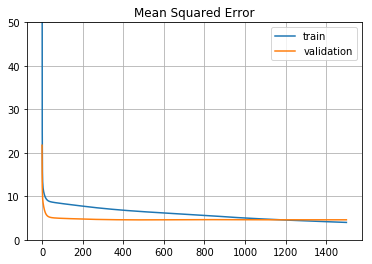

In [28]:
mse = np.square(nnet.predict(Xval) - yval).mean()
print('\nMSE: {:.3f}'.format(mse))

plot.plot([c1 for i, c1, c2 in costs], label='train')
plot.plot([c2 for i, c1, c2 in costs], label='validation')
plot.ylim(0, 50.)
plot.legend()
plot.grid()
plot.title('Mean Squared Error');

### Implementando com o Keras

In [29]:
def build():  
    model = Sequential()
    model.add(Dense(layer_sizes[1], activation='sigmoid', input_dim=layer_sizes[0]))
    for i, nn in enumerate(layer_sizes[2:-1]):
        model.add(Dense(nn, activation='sigmoid'))
    model.add(Dense(layer_sizes[-1], activation='linear'))
    return model

nnet_keras = build()
nnet_keras.summary()
loss = 'mse'

if 1:
    def my_mean_squared_error(y_true, y_pred):
        return tf.reduce_mean(tf.square(y_true - y_pred)) / 2.0
    
    loss = my_mean_squared_error

    # Using the initial random weights from our implementation
    print([w.shape for w in W_init])
    print([w.shape for w in nnet_keras.get_weights()])
    weights = []
    for W in W_init:
        weights.append(W[1:, :])
        weights.append(W[0, :])
    print([w.shape for w in weights])
    nnet_keras.set_weights(weights)

opt = SGD(lr=lr)
nnet_keras.compile(loss=loss, optimizer=opt)

try:
    t0 = time.time()
    histo2 = nnet_keras.fit(Xtra, ytra, batch_size=batch_size, epochs=n_epochs, verbose=0, shuffle=False,
                      validation_data=(Xval, yval), callbacks=[])
    t1 = time.time()
except KeyboardInterrupt:
    pass

print('\nTrained in {:2f}s'.format(t1-t0))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 40)                520       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 41        
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________
[(13, 40), (41, 1)]
[(12, 40), (40,), (40, 1), (1,)]
[(12, 40), (40,), (40, 1), (1,)]

Trained in 5.269749s



MSE: 9.194


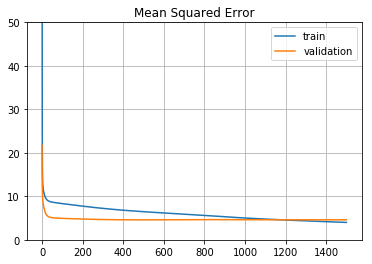

In [30]:
mse = np.square(nnet_keras.predict(Xval, verbose=0) - yval).mean()
print('\nMSE: {:.3f}'.format(mse))

plot.plot(histo2.history['loss'], label='train')
plot.plot(histo2.history['val_loss'], label='validation')
plot.ylim(0, 50)
plot.legend()
plot.grid()
plot.title('Mean Squared Error');